In [1]:
#Import all neccessary packages and modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

plt.style.use('ggplot')

#Gives credentials for api access to GCP
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/Users/phillliprashaad/Google_API_Key.json' 

#Connects to medicare data set
import bq_helper
from bq_helper import BigQueryHelper
medicare = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="cms_medicare")
bq_assistant = BigQueryHelper("bigquery-public-data", "cms_medicare")





In [2]:
#Define helper functions
def left_df_merge(df1, df2, col1, col2 ):
    '''Helps left merge data frames
    
        df1:  Left Dataframe
        df2:  Right Dataframe
        col1: Left column to merge on
        col2: Right column to merge on
        
        Returns: Merged Dataframe
    '''
    
    
    df_merge = df1.merge(df2, how='left', 
                            left_on=col1, 
                            right_on=col2 )
    return df_merge


def filter_DF(df, colname, string):
    '''Searches a specific column to see if it contains a given value
        
        df:       The dataframe to search
        colname:  Name of column to search
        string:   String to search
        
        Returns: Filtered Dataframe
    '''
    mask = df[colname].str.contains(string)
    return df[mask]


In [3]:
#There are 23 tables in this database.
bq_assistant.list_tables()

['home_health_agencies_2013',
 'home_health_agencies_2014',
 'hospice_providers_2014',
 'hospital_general_info',
 'inpatient_charges_2011',
 'inpatient_charges_2012',
 'inpatient_charges_2013',
 'inpatient_charges_2014',
 'inpatient_charges_2015',
 'nursing_facilities_2013',
 'nursing_facilities_2014',
 'outpatient_charges_2011',
 'outpatient_charges_2012',
 'outpatient_charges_2013',
 'outpatient_charges_2014',
 'outpatient_charges_2015',
 'part_d_prescriber_2014',
 'physicians_and_other_supplier_2012',
 'physicians_and_other_supplier_2013',
 'physicians_and_other_supplier_2014',
 'physicians_and_other_supplier_2015',
 'referring_durable_medical_equip_2013',
 'referring_durable_medical_equip_2014']

In [4]:
#Focusing on part_d_prescriber_2014 table. Viewing the table schema helps us understand the table layout
bq_assistant.table_schema('part_d_prescriber_2014')

,name,type,mode,description
0,npi,STRING,REQUIRED,National Provider Identifier
1,nppes_provider_last_org_name,STRING,NULLABLE,Last Name/Organization Name of the Provider
2,nppes_provider_first_name,STRING,NULLABLE,First Name of the Provider
3,nppes_provider_city,STRING,NULLABLE,City of the Provider
4,nppes_provider_state,STRING,NULLABLE,State Code of the Provider
5,specialty_description,STRING,NULLABLE,Provider Specialty Type
6,description_flag,STRING,NULLABLE,Source of Provider Specialty
7,drug_name,STRING,REQUIRED,Name of the drug
8,generic_name,STRING,NULLABLE,Generic name of the drug
9,bene_count,INTEGER,NULLABLE,Number of Medicare Beneficiaries


In [5]:
#Looking at the first 15 records of table 'part_d_prescriber_2014' in a Pandas DataFrame
bq_assistant.head('part_d_prescriber_2014', num_rows=15)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_day_supply_ge65,total_drug_cost_ge65,total_30_day_fill_count,total_30_day_fill_count_ge65
0,1003002817,IGLESIAS,NAYVIS,DORAL,FL,Family Practice,S,CILOSTAZOL,CILOSTAZOL,14.0,...,4020,1428.25,NaN,#,110,None,3450,1278.20,134.0,115.0
1,1003009218,NOLEN,JAMES,MORRILTON,AR,Family Practice,S,LORAZEPAM,LORAZEPAM,26.0,...,2900,827.61,14.0,None,56,None,1250,464.61,116.1,56.1
2,1003013756,PHUNG,ANDY,LENOIR,NC,Family Practice,S,ALLOPURINOL,ALLOPURINOL,14.0,...,3540,707.65,NaN,*,42,None,2280,399.14,118.0,76.0
3,1003034851,GUST,AMY,SEVIERVILLE,TN,Family Practice,S,ALLOPURINOL,ALLOPURINOL,21.0,...,4844,849.56,NaN,#,84,None,3944,662.59,162.0,132.0
4,1003070723,BEARD,MARK,SOUTHFIELD,MI,Family Practice,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,65.0,...,6654,6399.23,36.0,None,147,None,3273,3046.12,275.2,149.1
5,1003096587,IRIARTE,MANRIQUE,PEMBROKE PINES,FL,Internal Medicine,S,GLIPIZIDE XL,GLIPIZIDE,NaN,...,1303,513.84,NaN,*,41,None,1303,513.84,43.4,43.4
6,1003243544,MCDONNELL,KATHRYN,POUGHKEEPSIE,NY,Nurse Practitioner,S,GABAPENTIN,GABAPENTIN,23.0,...,2244,966.51,NaN,#,39,None,1224,532.80,75.0,41.0
7,1003803321,TURNER,KENNETH,RUSSELLVILLE,AR,Family Practice,S,MELOXICAM,MELOXICAM,42.0,...,6689,1042.49,NaN,#,136,None,4460,660.38,235.0,160.0
8,1003803552,TOWNE,WILLIAM,GENEVA,IL,Cardiology,S,SIMVASTATIN,SIMVASTATIN,13.0,...,2550,502.81,13.0,None,39,None,2550,502.81,85.0,85.0
9,1003806621,DESANTOLA,JOSEPH,HENDERSONVILLE,NC,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,30.0,...,6305,798.13,NaN,#,88,None,4985,643.78,211.0,167.0


In [6]:
#What states had the most overall prescriptions?
#Assumption: States with larger populations will have more prescriptions

query1 = """SELECT
  nppes_provider_state AS state,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  state
ORDER BY
  total_claim_count_millions DESC
;
        """
response1 = medicare.query_to_pandas_safe(query1)
response1.head(51)

,state,total_claim_count_millions
0,CA,116.0
1,FL,91.0
2,NY,80.0
3,TX,76.0
4,PA,63.0
5,OH,53.0
6,NC,46.0
7,IL,43.0
8,MI,39.0
9,GA,39.0


In [7]:
#Set SQL Query equal to python variable.
max_presc_by_state = response1.head(51).copy()

max_presc_by_state.set_index('state', inplace=True)

max_presc_by_state.head()

,total_claim_count_millions
state,
CA,116.0
FL,91.0
NY,80.0
TX,76.0
PA,63.0


In [8]:
#The total number of prescriptions in the United States in 2014 was 1.2 billion
max_presc_by_state.sum()

total_claim_count_millions    1227.0
dtype: float64

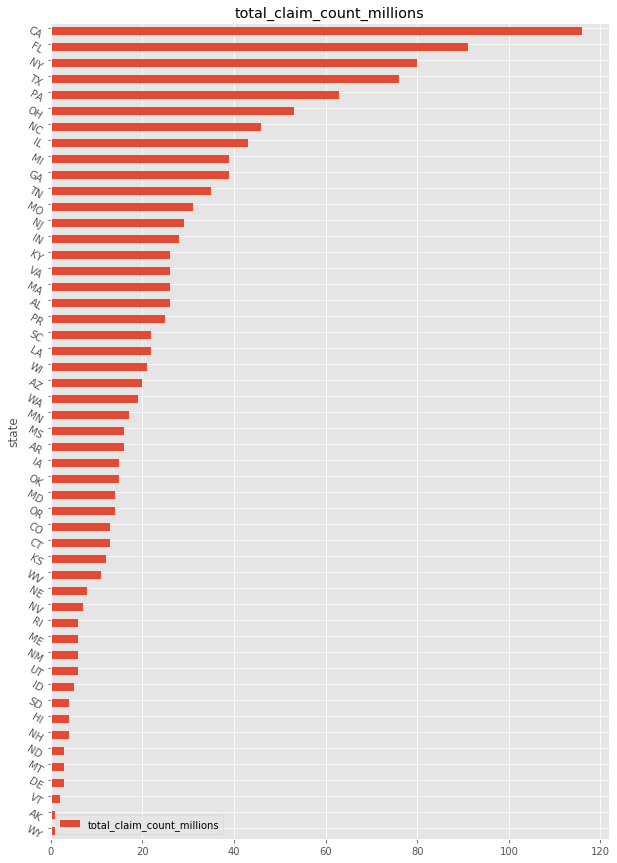

In [9]:
#Graphical representation of table
max_presc_by_state.sort_values('total_claim_count_millions',inplace=True)
max_presc_by_state.plot.barh(rot=-30, subplots=True,figsize =(10,15), position=.9 );

In [10]:
#How many distinct medications are in this table?

RXquery = """SELECT COUNT (DISTINCT drug_name) AS distinct_drugs
FROM `bigquery-public-data.cms_medicare.part_d_prescriber_2014`

        """
response3 = medicare.query_to_pandas_safe(RXquery, max_gb_scanned=10)
response3.head(51)

,distinct_drugs
0,2703


In [11]:
#Lets view the top 5 most prescribed drugs in each state.


ST5query = ''' SELECT * FROM (SELECT nppes_provider_state AS state,
                                generic_name AS drug_name,
                                sum(total_claim_count),
                                RANK () OVER (PARTITION BY nppes_provider_state ORDER BY sum(total_claim_count) DESC) AS row_rank
                                FROM `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
                                GROUP BY nppes_provider_state, drug_name
                                ORDER BY sum(total_claim_count) DESC
                                )
                WHERE row_rank <= 5
                ORDER BY state'''

responseST5 = medicare.query_to_pandas_safe(ST5query, max_gb_scanned=10)
responseST5.head(350)

,state,drug_name,f0_,row_rank
0,AA,AMOXICILLIN,225,1
1,AA,HYDROCODONE/ACETAMINOPHEN,180,2
2,AA,IBUPROFEN,155,3
3,AA,AZITHROMYCIN,78,4
4,AA,METHYLPREDNISOLONE,71,5
...,...,...,...,...
300,ZZ,HYDROCODONE/ACETAMINOPHEN,2232,1
301,ZZ,AMLODIPINE BESYLATE,1076,2
302,ZZ,LISINOPRIL,1046,3
303,ZZ,SIMVASTATIN,1041,4


In [12]:
#Assign state top 5 query to python variable
state_top5_df = responseST5.head(350).copy()

#Rename column "f0_" to 'total_claims_count'
state_top5_df.rename(columns={'f0_':'total_claims_count'}, inplace=True)

#The dataset has erroneous states. These will be cleaned and filtered later
state_top5_df.head()

,state,drug_name,total_claims_count,row_rank
0,AA,AMOXICILLIN,225,1
1,AA,HYDROCODONE/ACETAMINOPHEN,180,2
2,AA,IBUPROFEN,155,3
3,AA,AZITHROMYCIN,78,4
4,AA,METHYLPREDNISOLONE,71,5


In [13]:
#Check the frequency that each drug appears in a state's top 5
state_top5_df.groupby('drug_name')['drug_name'].count().sort_values(ascending=False)

drug_name
LEVOTHYROXINE SODIUM            53
LISINOPRIL                      53
OMEPRAZOLE                      38
AMLODIPINE BESYLATE             36
SIMVASTATIN                     36
HYDROCODONE/ACETAMINOPHEN       30
ATORVASTATIN CALCIUM            24
FUROSEMIDE                       7
METFORMIN HCL                    5
AMOXICILLIN                      3
LOSARTAN POTASSIUM               3
FINASTERIDE                      2
IBUPROFEN                        2
GABAPENTIN                       1
AZITHROMYCIN                     1
CHLORHEXIDINE GLUCONATE          1
TAMSULOSIN HCL                   1
HYDROCHLOROTHIAZIDE              1
LOSARTAN/HYDROCHLOROTHIAZIDE     1
METHYLPREDNISOLONE               1
METOPROLOL SUCCINATE             1
METOPROLOL TARTRATE              1
NAPROXEN                         1
NIFEDIPINE                       1
PRAVASTATIN SODIUM               1
ALPRAZOLAM                       1
Name: drug_name, dtype: int64

In [14]:
#The medication table alone is not enough to test my null hypothesis.
#I suspect population size, race, gender and location will be important variables

In [15]:
#Import population data into dataframe
population_df = pd.read_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Health Care/import_tables/region_pop_2.csv')

population_df.head()

,SUMLEV,REGION_dig,REGION_name,DIVISION_dig,DIVISION_name,STATE_dig,STATE_abb,NAME,CENSUS2010POP,ESTIMATESBASE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0.0,ALL,0.0,NON DIVISION,0,NaN,United States,308745538,308758105,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1.0,Northeast,0.0,NON DIVISION,0,NaN,Northeast Region,55317240,55318443,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2.0,Midwest,0.0,NON DIVISION,0,NaN,Midwest Region,66927001,66929725,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3.0,South,0.0,NON DIVISION,0,NaN,South Region,114555744,114563030,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4.0,West,0.0,NON DIVISION,0,NaN,West Region,71945553,71946907,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [16]:
#Import demographics table
demographic_df = pd.read_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Where_Are_The_Drugs/import_tables/demographic_by_state.csv')

demographic_df.head()

,Year.id,Year.display-label,Sex.id,Sex.display-label,Hisp.id,Hisp.display-label,GEO.id,GEO.id2,state.name,state.abb,totpop,white,black,native.american,asian,pacific.islander,multi.racial
0,cen42010,"April 1, 2010 Census",female,Female,hisp,Hispanic,0100000US,NaN,United States,NON STATE,24858794,21936806,1191984,702309,249346,85203,693146
1,cen42010,"April 1, 2010 Census",female,Female,nhisp,Not Hispanic,0100000US,NaN,United States,NON STATE,132105418,100301335,19853611,1147502,7691693,246518,2864759
2,cen42010,"April 1, 2010 Census",female,Female,tothisp,Total,0100000US,NaN,United States,NON STATE,156964212,122238141,21045595,1849811,7941039,331721,3557905
3,cen42010,"April 1, 2010 Census",male,Male,hisp,Hispanic,0100000US,NaN,United States,NON STATE,25618800,22681299,1136129,773939,248654,92206,686573
4,cen42010,"April 1, 2010 Census",male,Male,nhisp,Not Hispanic,0100000US,NaN,United States,NON STATE,126162526,97017621,18068911,1115756,6969823,250698,2739717


In [17]:
#Import cleaned and consolidated 2014 data
consol_percent_2014_df = pd.read_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Where_Are_The_Drugs/import_tables/consol_percent_2014.csv')

consol_totals_2014_df = pd.read_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Where_Are_The_Drugs/import_tables/consol_totals_2014.csv')

In [18]:
#Check the column names and datatypes
consol_percent_2014_df.head()

,state,drug_name,treatment_for,REGION_name,DIVISION_name,row_rank,total_claims_count_percent,black_female_percent,black_male_percent,white_female_percent,...,asian_female_percent,asian_male_percent,pac_islander_female_percent,pac_islander_male_percent,nat_amer_female_percent,nat_amer_male_percent,mult_rac_female_percent,mult_rac_male_percent,female_total_percent,male_total_percent
0,AK,HYDROCODONE/ACETAMINOPHEN,SEVERE PAIN RELIEF,West,Pacific,2,0.165460,0.014071,0.01894,0.290837,...,0.030748,0.027848,0.005832,0.006019,0.071217,0.073136,0.031959,0.032239,0.476333,0.523699
1,AK,LEVOTHYROXINE SODIUM,HYPOTHYROIDISM,West,Pacific,4,0.198270,0.014071,0.01894,0.290837,...,0.030748,0.027848,0.005832,0.006019,0.071217,0.073136,0.031959,0.032239,0.476333,0.523699
2,AK,LISINOPRIL,HIGH BLOOD PRESSURE,West,Pacific,5,0.277399,0.014071,0.01894,0.290837,...,0.030748,0.027848,0.005832,0.006019,0.071217,0.073136,0.031959,0.032239,0.476333,0.523699
3,AK,OMEPRAZOLE,GASTROESOPHAGEAL REFLUX DISEASE,West,Pacific,3,0.195315,0.014071,0.01894,0.290837,...,0.030748,0.027848,0.005832,0.006019,0.071217,0.073136,0.031959,0.032239,0.476333,0.523699
4,AK,SIMVASTATIN,HIGH CHOLESTEROL,West,Pacific,1,0.163557,0.014071,0.01894,0.290837,...,0.030748,0.027848,0.005832,0.006019,0.071217,0.073136,0.031959,0.032239,0.476333,0.523699


In [20]:

state_df2 = consol_percent_2014_df.groupby(['state','drug_name'])['female_total_percent'].max()
state_df2

state  drug_name                
AK     HYDROCODONE/ACETAMINOPHEN    0.476333
       LEVOTHYROXINE SODIUM         0.476333
       LISINOPRIL                   0.476333
       OMEPRAZOLE                   0.476333
       SIMVASTATIN                  0.476333
                                      ...   
WY     HYDROCODONE/ACETAMINOPHEN    0.489516
       LEVOTHYROXINE SODIUM         0.489516
       LISINOPRIL                   0.489516
       OMEPRAZOLE                   0.489516
       SIMVASTATIN                  0.489516
Name: female_total_percent, Length: 250, dtype: float64

<BarContainer object of 250 artists>

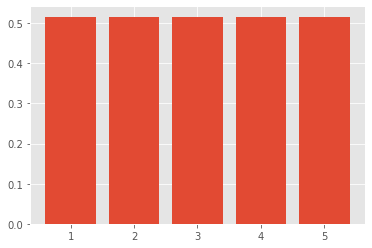

In [21]:
plt.bar(consol_percent_2014_df['row_rank'], consol_percent_2014_df['female_total_percent'])

In [23]:
consol_percent_2014_df.female_total_percent.value_counts()

0.507334    5
0.503054    5
0.508581    5
0.507469    5
0.502935    5
0.512327    5
0.497692    5
0.511413    5
0.509447    5
0.510560    5
0.510336    5
0.503710    5
0.515222    5
0.510621    5
0.489516    5
0.503757    5
0.498095    5
0.497328    5
0.511012    5
0.512632    5
0.502091    5
0.515582    5
0.503431    5
0.487733    5
0.504976    5
0.503246    5
0.508295    5
0.515972    5
0.505947    5
0.514290    5
0.512255    5
0.504516    5
0.506545    5
0.497115    5
0.512389    5
0.515179    5
0.505536    5
0.508945    5
0.514374    5
0.515306    5
0.505068    5
0.514986    5
0.509301    5
0.513218    5
0.496575    5
0.502043    5
0.499084    5
0.497162    5
0.500682    5
0.476333    5
Name: female_total_percent, dtype: int64

In [ ]:
#Heatmap shows the correlations between variables.
plt.subplots(figsize=(9,9))
sns.heatmap(consol_percent_2014_df.corr(), annot=False, center=1);

In [ ]:
#Create dataframe that compares females to males by percentage of state population.
male_vs_female_df = consol_percent_2014_df[ ['state','female_total_percent','male_total_percent']].groupby('state').max()
male_vs_female_df.head()

In [ ]:
#Shows important statistics about the columns of interest
male_vs_female_df.describe()

In [ ]:
#Overall there are more females than males in the United States
male_vs_female_df.plot.box();

In [ ]:
sns.violinplot(data=male_vs_female_df);

In [ ]:
consol_percent_2014_df[ ['female_total_percent','male_total_percent']].plot.hist(figsize=(7,6))


In [ ]:
consol_percent_2014_df.groupby('treatment_for').sum().plot.bar(y=['female_total_percent','male_total_percent'], 
                                                                rot=-30,
                                                                position=2.5)

In [ ]:
consol_percent_2014_df.columns

In [ ]:
#Compare Arkansas to Denver using Two Sample Approximate test
# shared_sample_freq = (samp1Success + samp2Success) / (sampN1 + sampN2)
# shared_sample_variance = ( (sampN1 + sampN2) * shared_sample_freq * (1 - shared_sample_freq) )/ (sampN1 * sampN2)
# difference_in_proportions = stats.norm(loc=mean, scale=StdDev)



'''shared_sample_freq = (58.0 + 65.0) / 180
shared_sample_variance = 180 * (shared_sample_freq * (1 - shared_sample_freq)) / 8000

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))'''

ak_levo_df = filter_DF(consol_percent_2014_df,'state','AK')               #Filter on Arkansas
ak_levo_df = filter_DF(ak_levo_df,'drug_name','LEVOTHYROXINE SODIUM')     #Filter on Levothryoxine Sodium

de_levo_df = filter_DF(consol_percent_2014_df,'state','DE')               #Filter on Arkansas
de_levo_df = filter_DF(ak_levo_df,'drug_name','LEVOTHYROXINE SODIUM')     #Filter on Levothryoxine Sodium

In [ ]:
de_levo_df
ak_levo_df

In [ ]:
levo_df = filter_DF(consol_percent_2014_df,'drug_name','LEVOTHYROXINE SODIUM')     #Filter on Levothryoxine Sodium

axf = sns.regplot(x=levo_df['female_total_percent'], y=levo_df['row_rank'], line_kws={"color":"r","alpha":0.7,"lw":5})
axf.set_title('LEVOTHYROXINE SODIUM FEMALE ROW RANK')

#axm = sns.regplot(x=levo_df['male_total_percent'], y=levo_df['row_rank'], line_kws={"color":"b","alpha":0.7,"lw":5})
#axm.set_title('LEVOTHYROXINE SODIUM FEMALE ROW RANK');

In [ ]:
def row_rank_change(row):
    if row == 1:
        return 5
    elif row == 2:
        return 4
    elif row == 3:
        return 3
    elif row == 4:
        return 2
    else:
        return 1

In [ ]:
levo_df['change_row_rank']= levo_df['row_rank'].apply(lambda x: row_rank_change(x))

In [ ]:
lv_df2 = levo_df[['state','drug_name','change_row_rank','female_total_percent','male_total_percent']]
lv_df2.head()

In [ ]:

lv_df2.groupby('change_row_rank')['female_total_percent'].mean().hist()
plt.show()

In [ ]:
fig, axs = plt.subplots()
total = consol_percent_2014_df['female_total_percent'] 

axs.hist(total, bins = 30);

In [ ]:
filter_DF(consol_percent_2014_df,'state',"AK")

In [ ]:
consol_percent_2014_df[['drug_name','row_rank'] ][consol_percent_2014_df['drug_name'] == 'LEVOTHYROXINE SODIUM'].groupby('row_rank').count()

In [ ]:
consol_percent_2014_df[['female_total_percent','row_rank'] ][consol_percent_2014_df['drug_name'] == 'LEVOTHYROXINE SODIUM'].groupby('row_rank').mean()

In [ ]:
consol_percent_2014_df['change_row_rank']= consol_percent_2014_df['row_rank'].apply(lambda x: row_rank_change(x))

In [ ]:
#consol_percent_2014_df.to_csv('row_rank_change.csv')

In [74]:
#Look at female percentage by state
fem_state_df = consol_percent_2014_df[['state','female_total_percent']].groupby('state').max()
fem_state_df.head()

,female_total_percent
state,
AK,0.476333
AL,0.515306
AR,0.508945
AZ,0.503054
CA,0.503710


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d421b50>]],
      dtype=object)

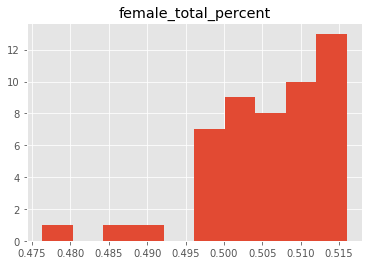

In [29]:
fem_state_df.hist()

In [48]:
#Look at row rank of LEVOTHYROXINE SODIUM by state
levo_rank_state_df = pd.read_csv('/Users/phillliprashaad/Desktop/Galvanzie_DSI/Capstone_1/Where_Are_The_Drugs/import_tables/LEVOTHYROXINE_SODIUM_table.csv')


In [73]:
levo_rank_state_df.head()

,drug_name,state,female_total_percent,row_rank,difference
0,LEVOTHYROXINE SODIUM,AK,47.633315,4,43.633315
1,LEVOTHYROXINE SODIUM,AL,51.530557,3,48.530557
2,LEVOTHYROXINE SODIUM,AR,50.894489,4,46.894489
3,LEVOTHYROXINE SODIUM,AZ,50.305382,5,45.305382
4,LEVOTHYROXINE SODIUM,CA,50.371024,5,45.371024


In [50]:
#I believe the p value is extremly low because percent in decimal but rank in integer
stats.wilcoxon(levo_rank_state_df['female_total_percent'],levo_rank_state_df['row_rank'])

WilcoxonResult(statistic=0.0, pvalue=1.1100954635085601e-09)

In [52]:
#Lets scale and see what happens
levo_rank_state_df['female_total_percent'] *= 100



In [58]:
stats.wilcoxon(y=levo_rank_state_df['female_total_percent'],x=levo_rank_state_df['row_rank'])

WilcoxonResult(statistic=0.0, pvalue=1.1100954635085601e-09)

In [68]:
#adding a difference column and going to just use the difference column in scipy

levo_rank_state_df['difference'] = levo_rank_state_df['female_total_percent']-levo_rank_state_df['row_rank']


In [70]:
levo_rank_state_df.head()

,drug_name,state,female_total_percent,row_rank,difference
0,LEVOTHYROXINE SODIUM,AK,47.633315,4,43.633315
1,LEVOTHYROXINE SODIUM,AL,51.530557,3,48.530557
2,LEVOTHYROXINE SODIUM,AR,50.894489,4,46.894489
3,LEVOTHYROXINE SODIUM,AZ,50.305382,5,45.305382
4,LEVOTHYROXINE SODIUM,CA,50.371024,5,45.371024


In [75]:
s, p = stats.wilcoxon(levo_rank_state_df.difference)

In [89]:
print('p   =  {}\n1-p = {}'.format(p,1-p))

p   =  1.1100954635085601e-09
1-p = 0.9999999988899045


In [65]:
#Wilcoxon example from https://www.youtube.com/watch?v=mbpGCxYya3M
# Define a dictionary containing example data
#The p value should be 1.99
data = {'before':[28,17,36,35,32,33], 'after':[12,31, 19, 14,20, 19] }
EX_table = pd.DataFrame(data)
EX_table

,before,after
0,28,12
1,17,31
2,36,19
3,35,14
4,32,20
5,33,19


In [66]:
stats.wilcoxon(EX_table.before,EX_table.after)

/Users/phillliprashaad/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=2.5, pvalue=0.09259159575022993)